<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/marco-canas/Ecuaciones_Diferenciales/blob/main/asesoria_EDO/ejer_sec_3.1/Ejer_22_sec_3.1_Boyce_DiPrima.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
  <td>
    <a target="_blank" href="https://kaggle.com/kernels/welcome?src=https://github.com/marco-canas/Ecuaciones_Diferenciales/blob/main/asesoria_EDO/ejer_sec_3.1/Ejer_22_sec_3.1_Boyce_DiPrima.ipynb"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" /></a>
  </td>
</table>

# Parcial 2 EDO 

## Punto 1 

(10 puntos) Encuentre $\alpha$ de modo que la solución del problema con valor inicial 

$$ y'' - y' - 2y = 0, \ \ \ \  y(0) = \alpha, \ \ \  y'(0) = 2 $$

tienda a cero cuando $t$ tiende a infinito.   

(10 puntos) Verifique que su solución encontrada satisface el PVI. 

(opcional) Verificar en la plataforma Colaboratory y compartir al profesor el archivo ipynb de su verificación. 

## Solución con sympy, numpy y matplotlib

Sigue paso a paso las indicaciones que se te preseten para adquirir los conceptos de PVI definido por una ecuación lineal de segundo orden y de su solución:  

Paso 1: Importe las librerías numpy, sympy y matplotlib

In [1]:
import numpy as np 

from sympy import *

import matplotlib.pyplot as plt 

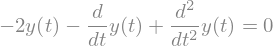

In [1]:
init_printing()  # LaTeX-like pretty printing for IPython
t = Symbol("t", real=True)
alpha = Symbol('alpha', real=True)  # (0,alpha) pertenece al gráfico de la función solución
y = Function('y')
Eq1 = Eq( diff(y(t), t, 2) - diff(y(t), t) - 2*y(t), 0 ) # y'' - y' - 2y = 0 
display(Eq1)

In [29]:
print("Solución general de la EDO")
y_sol_gen = dsolve(Eq1, y(t)).rhs  # take only right hand side
display(Eq(y(t), y_sl0))

Solución general de la EDO


In [32]:
# Initial conditions:
condi_1 = Eq(y_sol_gen.subs(t, 0), alpha)  # y(0) = alpha
condi_2 = Eq(y_sol_gen.diff(t).subs(t, 0), 2)  # y'(0) = 2
display(condi_1)
display(condi_2) 

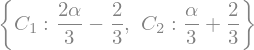

In [36]:
#  Solve for C1, C2:
C1, C2 = symbols("C1, C2")  # generic constants
C1C2_sol = solve([condi_1, condi_2], (C1, C2))
C1C2_sol 

Solución del PVI


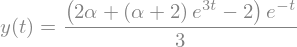

In [37]:
# Substitute back into solution:
y_sol_pvi = simplify(y_sol_gen.subs(C1C2_sol))
print("Solución del PVI")
display(Eq(y(t), y_sol_pvi)) 

In [38]:
y_sol_final = y_sol_pvi.subs({alpha:-2}) 
display(Eq(y(t), y_sol_final)) 

In [2]:
y_sol_final_lambda = lambdify(t,y_sol_final) 
# Convertimos la función de sympy en una función lambda de Python

NameError: name 'y_sol_final' is not defined

## Verificación gráfica de la solución obtenida 

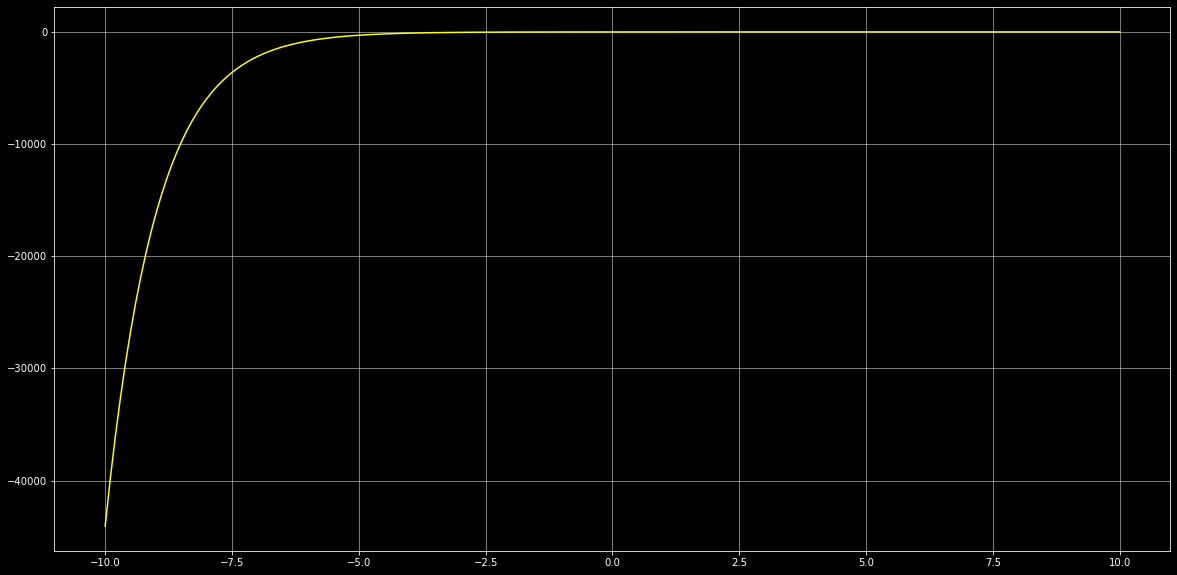

In [43]:
import numpy as np 
import matplotlib.pyplot as plt 
plt.style.use('dark_background')
t = np.linspace(-10,10,200)
fig, ax = plt.subplots(figsize = (20,10))
y_grafica = y_sol_final_lambdify(t)
ax.plot(t,y_grafica, color = 'yellow') 
ax.grid(True, alpha = 0.6)

plt.savefig('solPVI_alpha.png') 

## Solución analítica

## Punto 2

**Ejercicio 38 de la sección 3.1, página 144**  

**(10 puntos)** La solución de una ecuación de segundo orden de la forma $y'' = f(x,y,y')$ suele comprender dos constantes arbitrarias.  
A la inversa, es posible demostrar que una familia dada de funciones que contiene dos constantes arbitrarias es la solución de alguna ecuación diferencial de segundo orden.  
Para la siguiente familia de funciones, elimine las constantes $c_{1}$ y $c_{2}$ entre $y$, $y'$ y $y''$, para encontrar la ecuación diferencial que satisface la familia dada de funciones:

$$ y = c_{1}\cosh(x) + c_{2}\sinh(x) $$

**Sugerencia:**

Utilice que 

$$\frac{d}{dx}\cosh(x) = \sinh(x), \quad \text{y} \quad \frac{d}{dx}\sinh(x) = \cosh(x) $$

(10 puntos) Verifique su respuesta. 

## Punto 3 

**Ecuaciones en las que falta la $y$**  
Ejercicio 22. Página 143 

En una ecuación de segundo orden de la forma 

$$ y'' = f(x,y'), $$


la sustitución igual a $v = y'$, $v' = y''$ da una ecuación de primer orden de la forma 

$$ v' = f(x,v). $$

Si es posible resolver esta ecuación para $v$, entonces puede obtenerse $y$ al integrar 

$$ \frac{dy}{dx} = v. $$

Observe que el resolver la ecuación de primer orden para $v$ se obtiene una constante arbitraria y que en la integración para $y$ se introduce una segunda constante arbitraria. 



1. (15 puntos) Aplique esta sustitución para resolver la ecuación 

$$ x^{2}y'' = (y')^{2}, \quad \quad x > 0.  $$
2. (10 puntos) Verifique la solución obtenida

## Punto 4 
Página 143 sección 3.1 del Boyce DiPrima

**Ecuaciones en las que falta $x$** 

Si una ecuación diferencial de segundo orden tiene la forma 

$$ y'' = f(y,y'), $$

la variable independiente $x$ no aparece explícitamente, solo a través de la variable dependiente $y$. 


Si se hace $v = y'$, entonces se obtiene  

$$ \frac{dv}{dx} = f(y,v). $$

Como el segundo miembro de esta ecuación depende de $y$ y $v$, en lugar de $x$ y $v$, esta ecuación no es de la forma de las ecuaciones de primer orden analizadas en el capítulo 2.  
Sin embargo, si se piensa en $y$ como la variable independiente, entonces por la regla de la cadena, 

$$ \frac{dv}{dx} = \frac{dv}{dy} \cdot \frac{dy}{dx} = v \frac{dv}{dy}. $$

De donde la ecuación diferencial original puede escribirse como 

$$ v\frac{dv}{dy} = f(y,v) $$

En el supuesto de que sea posible resolver esta ecuación de primer orden, se obtiene $v$ como una función de $y$. 

Al resolver 

$$ \frac{dy}{dx} = v(y), $$

resulta una relación entre $y$ y $x$. 

Una vez más, en el resultado final aparecen dos constantes arbitrarias. 

Aplique este método para resolver la ecuación diferencial siguiente: (ejercicio 28 de la página 143)

$$ y'' + (y')^{2} = 2e^{-y} $$



## Solución: